In [18]:
from datetime import datetime
import matplotlib.pyplot as plt
import csv


file = "AAPL_max.csv"

with open(file, encoding="utf-8-sig") as fil:
    reader = csv.reader(fil)
    next(reader) # Går forbi første linje
    data = list(reader)


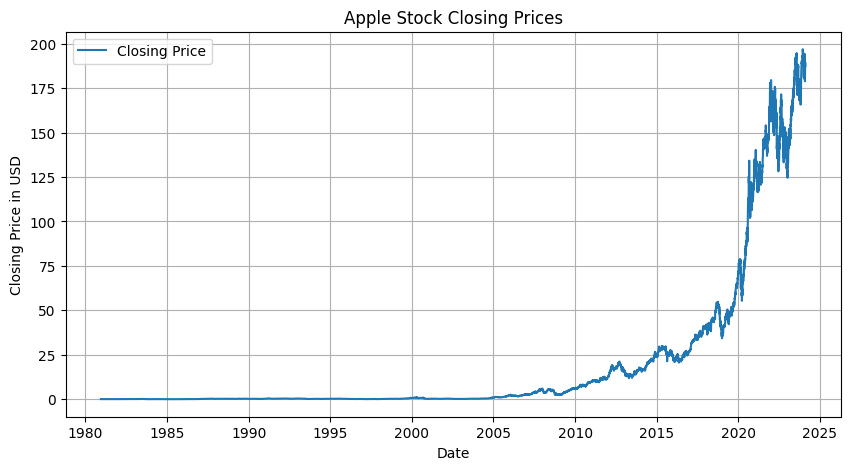

In [19]:
dates = []
closing_prices = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

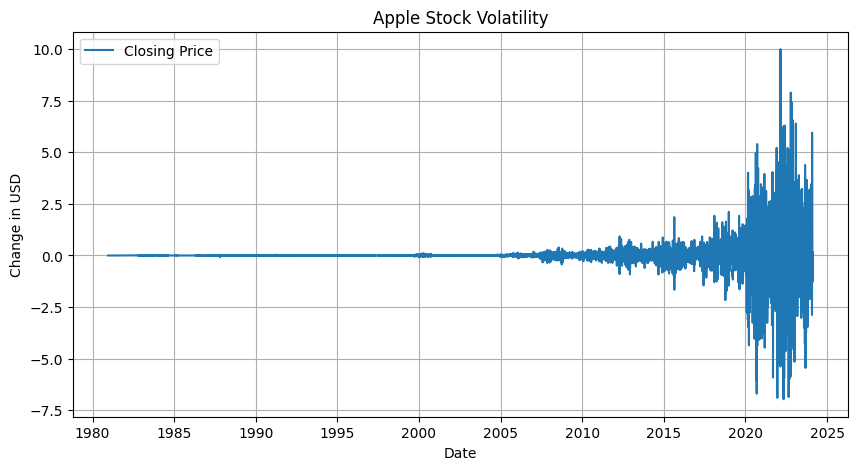

In [20]:
dates = []
volatility = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

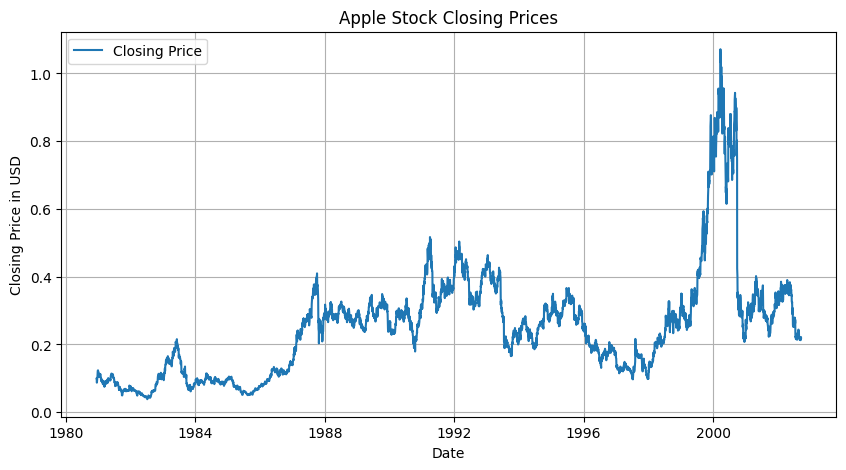

In [21]:
dates = []
closing_prices = []

for row in data[2:5500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

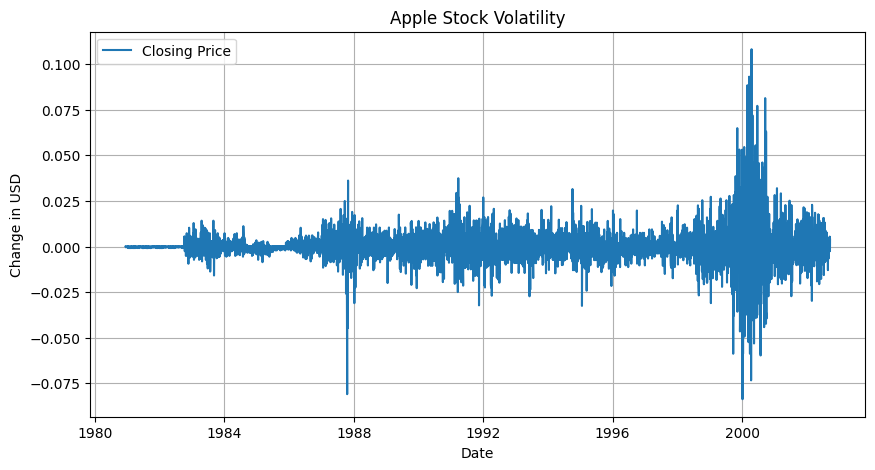

In [22]:
dates = []
volatility = []

for row in data[2:5500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

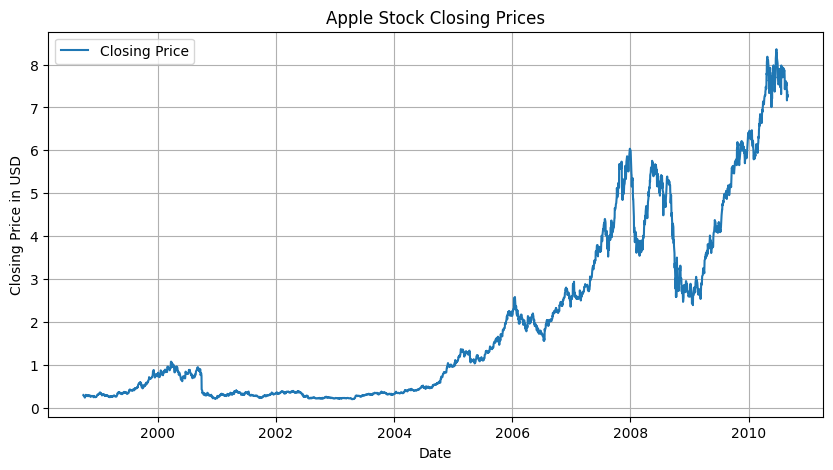

In [23]:
dates = []
closing_prices = []

for row in data[4500:7500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

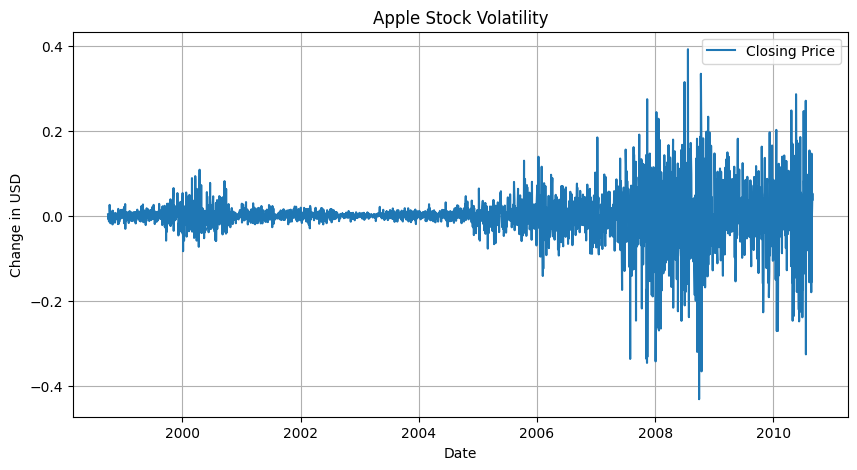

In [24]:
dates = []
volatility = []

for row in data[4500:7500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

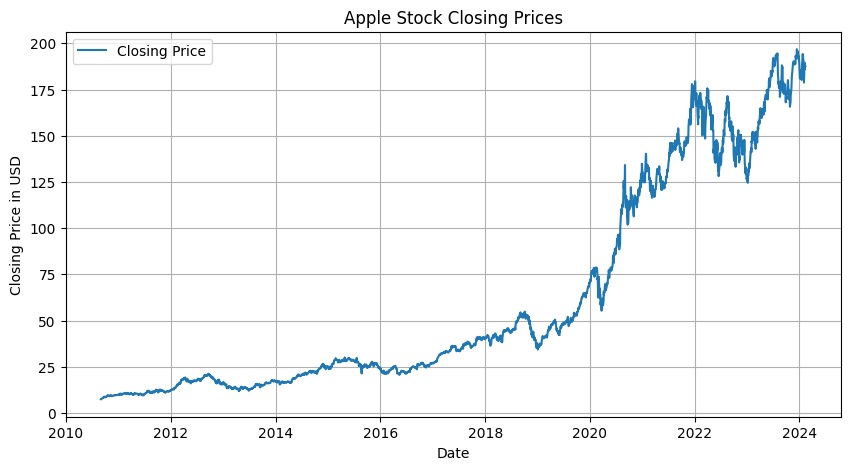

In [25]:
dates = []
closing_prices = []

for row in data[7500:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

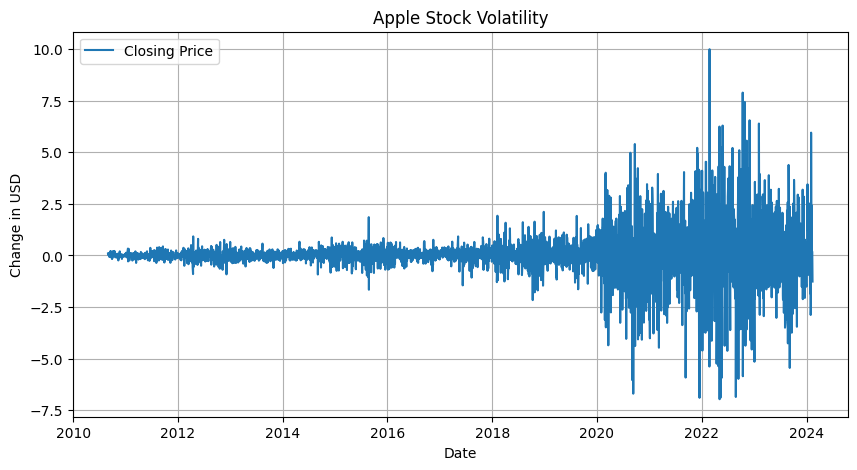

In [ ]:
dates = []
volatility = []

for row in data[7500:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()